In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
import seaborn as sns

In [72]:
df = pd.read_csv("bank-full.csv",delimiter=';')
df.head(10)  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [25]:
df['y'].value_counts()
#Looks like an imbalanced data set

no     39922
yes     5289
Name: y, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.shape

(45211, 17)

C:\Users\jayan\AppData\Local\Temp\ipykernel_15752\1350954422.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2,2))


<Figure size 200x200 with 0 Axes>

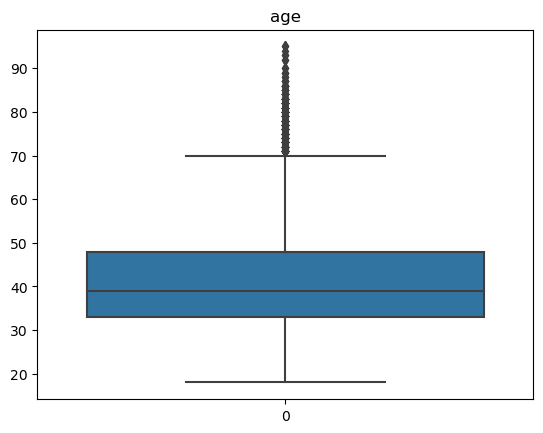

<Figure size 200x200 with 0 Axes>

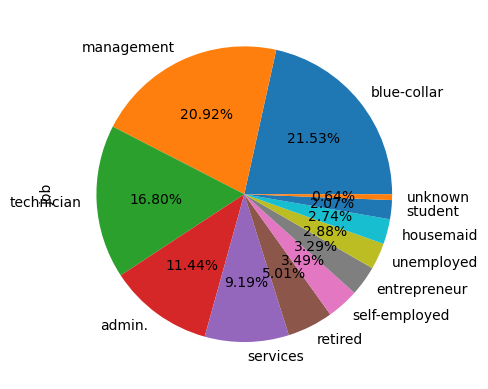

<Figure size 200x200 with 0 Axes>

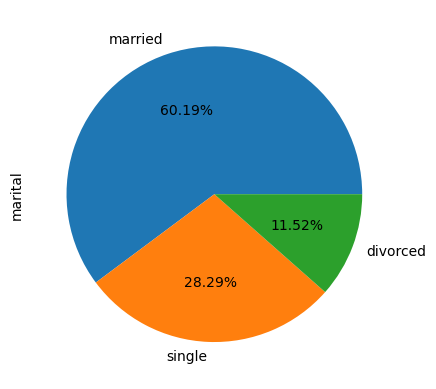

<Figure size 200x200 with 0 Axes>

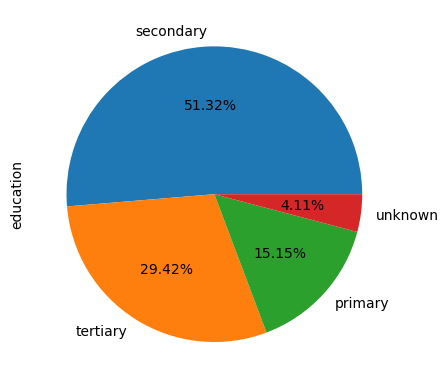

<Figure size 200x200 with 0 Axes>

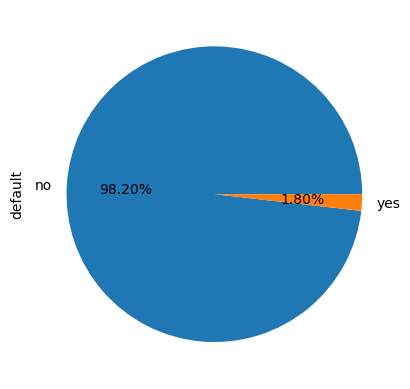

<Figure size 200x200 with 0 Axes>

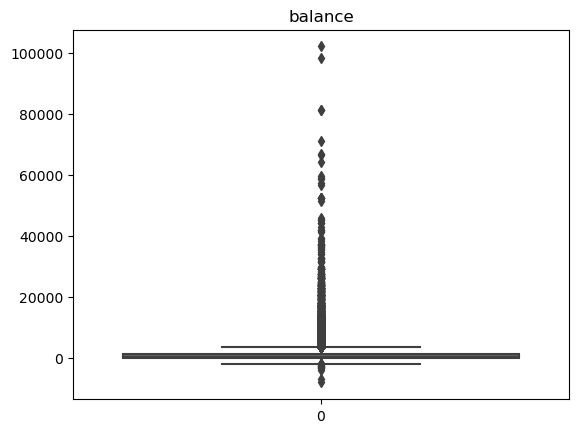

<Figure size 200x200 with 0 Axes>

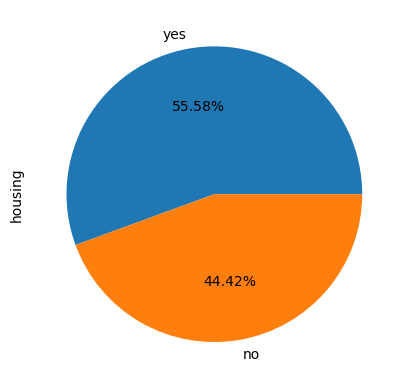

<Figure size 200x200 with 0 Axes>

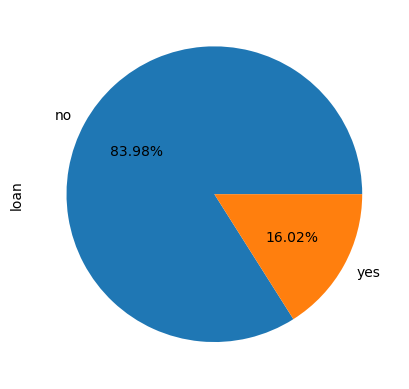

<Figure size 200x200 with 0 Axes>

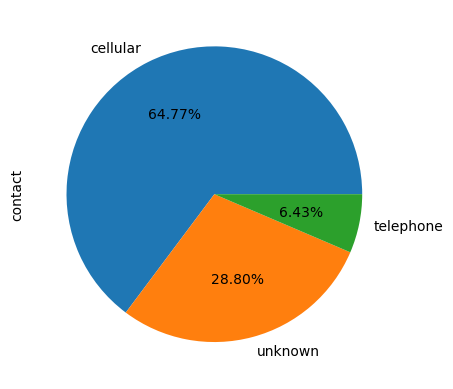

<Figure size 200x200 with 0 Axes>

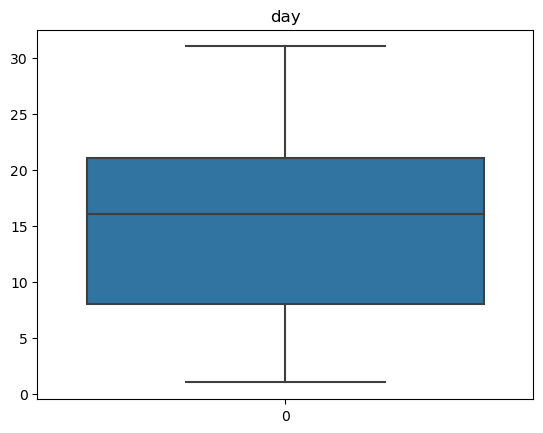

<Figure size 200x200 with 0 Axes>

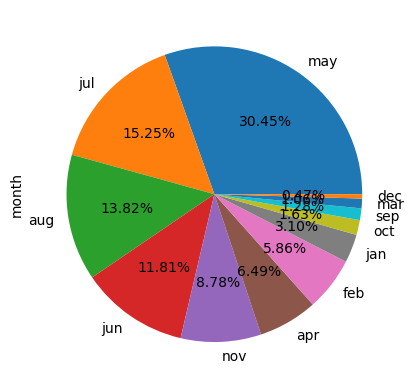

<Figure size 200x200 with 0 Axes>

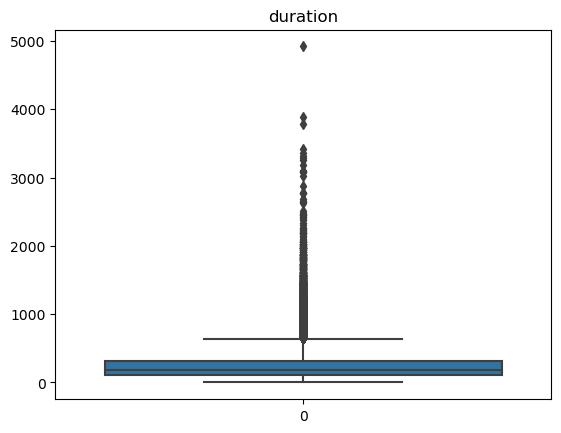

<Figure size 200x200 with 0 Axes>

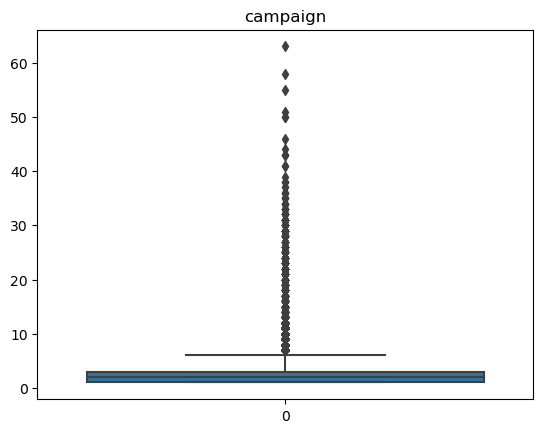

<Figure size 200x200 with 0 Axes>

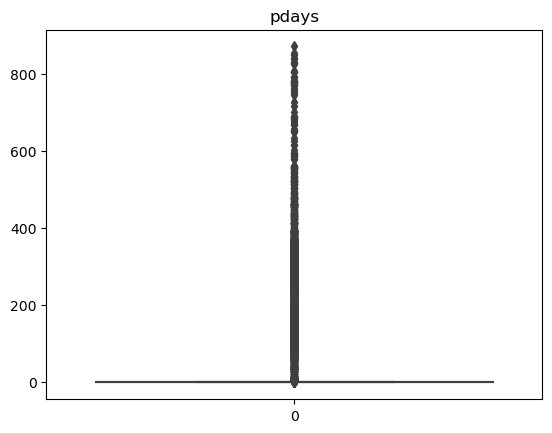

<Figure size 200x200 with 0 Axes>

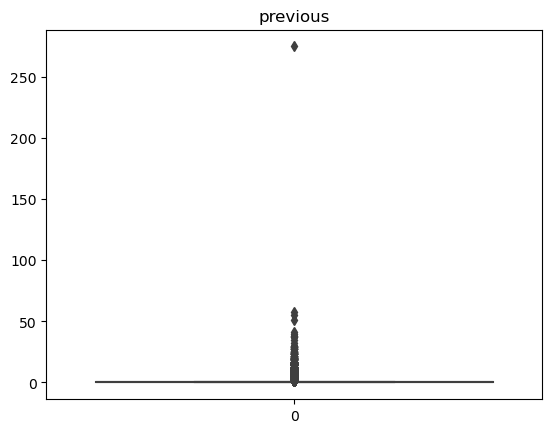

<Figure size 200x200 with 0 Axes>

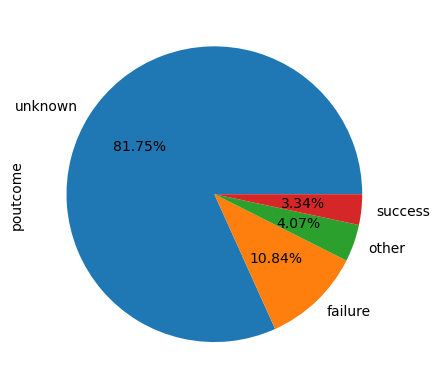

<Figure size 200x200 with 0 Axes>

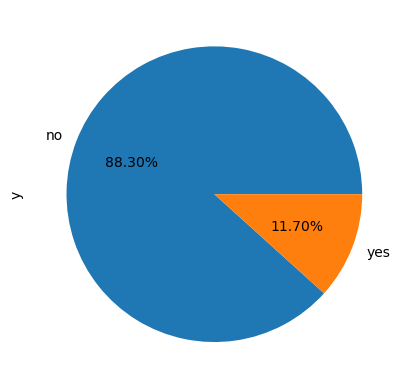

In [23]:
for i in df.columns:
    plt.figure(figsize=(2,2))
    ax=plt.subplots(1,1)
    if df[i].dtypes=='object':
        df[i].value_counts().plot(kind='pie',autopct='%0.2f%%')
    else:
        sns.boxplot(df[i])
        plt.title(i)

In [30]:
for i in df.columns: # Loop through all columns in the dataframe
    if df[i].dtype == 'object': # Only apply for columns with 
        print('\n',df[i].value_counts())


 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutco

#We alreadhabe have duration so there is no need for days and month, and also contact type is not going to help so we can remove that also

In [75]:
df.drop(columns=['day','month','contact'],inplace=True)

In [77]:
for i in df.columns:
    if df[i].dtype == 'int64':
        print(df[i])
        print('\n',df[i].unique())
        

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64

 [ 2143    29     2 ...  8205 14204 16353]
0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64

 [ 261  151   76 ... 1298 1246 1556]
0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
4521

In [78]:
#There are no missing values or null values in the table - It is a clean data set
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [79]:
df1=df
df1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


In [80]:
for i in df1.columns:
    if df1[i].dtypes=='int64':
        print(df1[i].skew())
        

0.6848179257252598
8.360308326166326
3.144318099423456
4.898650166179674
2.6157154736563477
41.84645447266292


In [81]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
pt=PowerTransformer()
sc=StandardScaler()
for i in df1.select_dtypes(include='int64'):
    if (df1[i].skew()>0.5) | (df1[i].skew()< -0.5):
        df1[i]=pt.fit_transform(df1[[i]])
    else:
        df1[i]=sc.fit_transform(df1[[i]])

In [82]:
df1.skew()

C:\Users\jayan\AppData\Local\Temp\ipykernel_15752\149261804.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


age         0.008605
balance     1.098582
duration    0.018045
campaign    0.230942
pdays       1.645213
previous    1.646051
dtype: float64

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i])

In [85]:
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,1.473637,4,1,2,0,0.414773,1,0,0.386077,-1.108191,-0.472533,-0.472500,3,0
1,0.429379,9,2,1,0,-0.410774,1,0,-0.223033,-1.108191,-0.472533,-0.472500,3,0
2,-0.709873,2,1,1,0,-0.431122,1,1,-0.923854,-1.108191,-0.472533,-0.472500,3,0
3,0.683128,1,1,3,0,0.197685,1,0,-0.735678,-1.108191,-0.472533,-0.472500,3,0
4,-0.709873,11,2,3,0,-0.432119,0,0,0.072812,-1.108191,-0.472533,-0.472500,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,9,1,2,0,-0.052398,0,0,2.057767,0.737650,-0.472533,-0.472500,3,1
45207,2.207438,5,0,0,0,0.275122,0,0,1.056254,0.134537,-0.472533,-0.472500,3,1
45208,2.257237,5,1,1,0,1.495765,0,0,2.257271,1.323745,2.122381,2.166630,2,1
45209,1.409327,1,1,1,0,-0.114235,0,0,1.191963,1.091724,-0.472533,-0.472500,3,0


<Axes: >

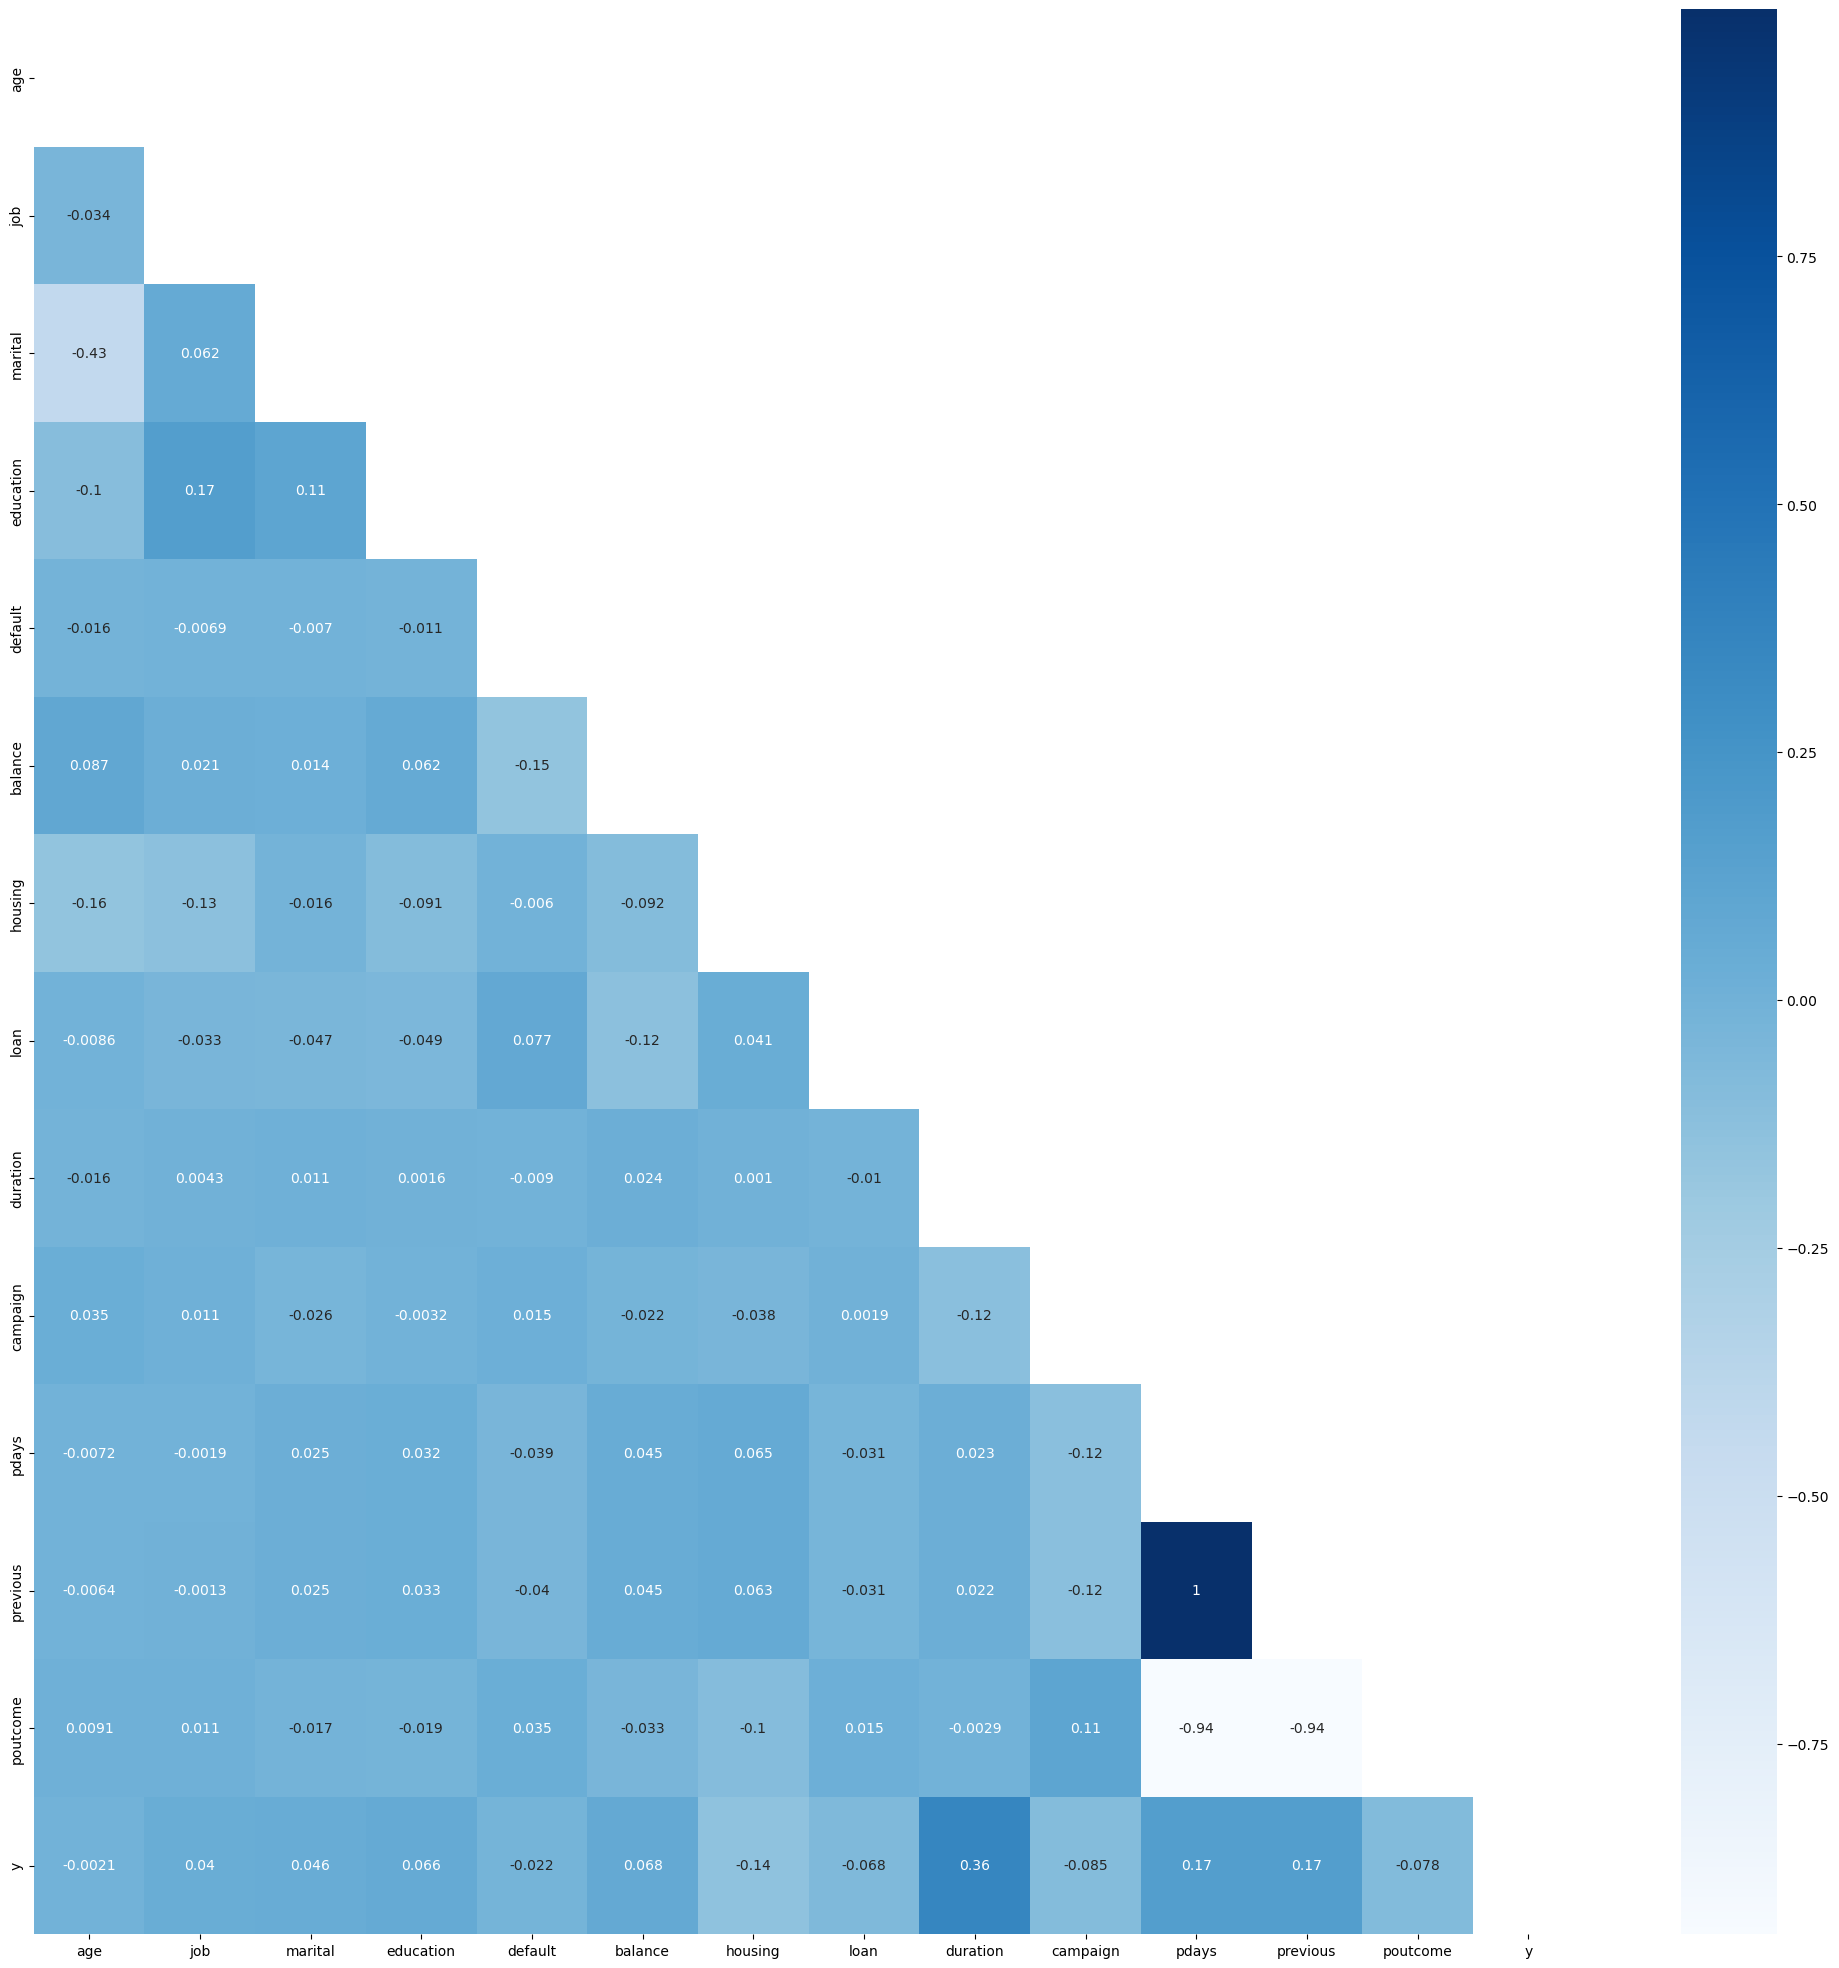

In [87]:
plt.figure(figsize = (25,25))

sns.heatmap(df.corr() , annot = True , cmap = 'Blues' , mask = np.triu(df1.corr()))

In [93]:
#Train_Test_Split
x=df1.drop(['y'],axis=1)
y=df1['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 10)

In [132]:
# invoking the decision tree classifier function.
#Restricting the depth of the tree to 10 (no particular reason for selecting this)
                                  
dt_model = DecisionTreeClassifier(random_state = 10,max_depth=10 )

In [133]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [134]:
# Making predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:,1]

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix and accuracy
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8960521950680084
[[7708  286]
 [ 654  395]]


In [136]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7994
           1       0.58      0.38      0.46      1049

    accuracy                           0.90      9043
   macro avg       0.75      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [137]:
# Check training and testing score
# Training Score
print('Training score')
print(dt_model.score(X_train,y_train))
print('Test score')
print(dt_model.score(X_test , y_test))

Training score
0.9228323379783234
Test score
0.8960521950680084


In [148]:
#Trying to fine tune the model

In [139]:
from sklearn.model_selection import GridSearchCV

model= DecisionTreeClassifier(random_state=0)

# hyper parameters to build the model on
params = {'criterion':('gini','entropy'), 
          'max_depth': range(3, 10),
         'min_samples_split': range(2, 8)}

#Making models with hyper parameters sets
grid_model = GridSearchCV(model, cv=5, param_grid=params)
#Learning
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(3, 10),
                         'min_samples_split': range(2, 8)})

In [141]:
print("Best Hyper Parameters:",grid_model.best_params_)

Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [142]:
dt_model = DecisionTreeClassifier(criterion = grid_model.best_params_.get('criterion'), 
                                  max_depth = grid_model.best_params_.get('max_depth'),
                                  min_samples_split = grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [143]:
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_test, y_pred)

array([[7779,  215],
       [ 716,  333]], dtype=int64)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.61      0.32      0.42      1049

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



Conclusion:

From the previous decision tree:

In [135]:
#From previous score report
# Printing confusion matrix and accuracy
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8960521950680084
[[7708  286]
 [ 654  395]]


In [152]:
#True No's:
print('True No:',(7708/(7708+286))*100)
print('True Yes:',(395/(395+654))*100)

True No: 96.42231673755316
True Yes: 37.65490943755958
